<a href="https://colab.research.google.com/github/ataullahkhanrifat/European-banking-crisis-2023/blob/main/European_banking_crisis_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data= pd.read_csv('/content/tweets.csv')

In [7]:
data.shape

(14090, 12)

In [8]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source'],
      dtype='object')

In [9]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,Business Today,India,"News, analysis & immersives from #BTMultiverse...",2010-06-30 14:55:57+00:00,1165920.0,421,2106,True,2023-03-29 06:11:39+00:00,UBS Group AG has rehired Sergio Ermotti as CEO...,NaN,Twitter Web App
1,BQ Prime,"Mumbai, India",#BQPrime is amongst #India’s youngest and most...,2016-03-29 08:30:59+00:00,299228.0,125,53,True,2023-03-29 06:11:32+00:00,"#UBS names #SergioErmotti as its CEO, replacin...","['UBS', 'SergioErmotti']",Twitter Web App
2,A Trader...,Earth,I trade fear and desire with love and passion ...,2021-09-09 11:56:48+00:00,211.0,42,13846,False,2023-03-29 06:09:44+00:00,"@scottmelker I think its not start yet, see th...",['bankencrisis'],Twitter Web App
3,The Way Of The Superior Men,NaN,I am a young man going through the journey of ...,2022-11-12 09:00:50+00:00,4.0,45,24,False,2023-03-29 06:05:37+00:00,Every single successful person has one thing i...,NaN,Twitter for iPhone
4,Spiros Margaris,All Over the World,#VC | No. 1 #Fintech @Refinitiv & @Onalytica |...,2014-08-06 05:20:16+00:00,128277.0,21196,232600,True,2023-03-29 06:03:49+00:00,UBS rehires #Ermotti as #CEO \n\nto steer #Cre...,"['Ermotti', 'CEO', 'CreditSuisse', 'fintech', ...",Buffer


In [10]:
data.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
14085,AGHOR SHIV,NaN,NON HINDU...NON RELIGIOUS...NON DUALIST...BRAH...,2014-07-21 18:03:05+00:00,16.0,166,17,False,2023-03-19 14:46:21+00:00,"FT ON CS: This is a messy,ugly transaction, no...",NaN,Twitter for Android
14086,0xGeorge,NaN,News About #Blockchain #Crypto #Bitcoin #NFTs ...,2021-11-02 17:05:23+00:00,15.0,29,131,False,2023-03-19 14:42:23+00:00,#Switzerland considers nationalizing #CreditSu...,"['Switzerland', 'CreditSuisse']",Twitter for Android
14087,Ketul Parmar,China/Russia/USA/India/Africa,"Democracy is an illusion.\nYuan, Ruble, Euro, ...",2020-02-14 14:40:21+00:00,1127.0,437,211727,False,2023-03-19 14:35:50+00:00,#BREAKING:\nSWITZERLAND WEIGHS NATIONALIZING C...,"['BREAKING', 'CreditSuisse']",Twitter for Android
14088,Vinay Thakur 🥸,"Pune, India",Low latency C++ developer | Doge ❤️ ❤️and VRA ...,2010-01-30 07:04:26+00:00,101.0,914,26091,False,2023-03-19 14:23:52+00:00,@elonmusk Pls buy $CS #CreditSuisse,['CreditSuisse'],Twitter for Android
14089,Mr.HSC,"Los Angeles, CA",Writer🤑Web3.0👻Investor😼Entrepreneur 🎾 🥊 🎿 🏋️‍♀...,2023-01-30 16:35:28+00:00,37.0,67,74,False,2023-03-19 14:23:03+00:00,the best come back story Iqbal Khan can have n...,NaN,Twitter Web App


In [11]:
data.dtypes

user_name            object
user_location        object
user_description     object
user_created         object
user_followers      float64
user_friends         object
user_favourites      object
user_verified        object
date                 object
text                 object
hashtags             object
source               object
dtype: object

In [12]:
# checking duplicate values if any
data.duplicated().sum()

# no duplicate values

0

In [13]:
# checking missing values if any

data.isnull().sum()

user_name              0
user_location       4184
user_description     923
user_created           1
user_followers         1
user_friends           1
user_favourites        1
user_verified          1
date                   1
text                   1
hashtags            3178
source                 2
dtype: int64

In [14]:
# Handling missing values
data.dropna(subset=['user_created','user_followers','user_friends','user_favourites','user_verified','date','text'],axis=0,inplace=True)

In [15]:
# Fixing index after dropping values
data.reset_index(drop=True,inplace=True)


In [16]:
data[data['user_location'].isnull()]

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
3,The Way Of The Superior Men,NaN,I am a young man going through the journey of ...,2022-11-12 09:00:50+00:00,4.0,45,24,False,2023-03-29 06:05:37+00:00,Every single successful person has one thing i...,NaN,Twitter for iPhone
5,Kia vj,NaN,Plan your trade & then trade your Plan \n#gold...,2020-08-04 06:26:30+00:00,1345.0,4999,2466,False,2023-03-29 06:01:26+00:00,#GOLD #XAUUSD\n\n*PREMIUM TRADES PROFIT*💰💰😍😍\n...,"['GOLD', 'XAUUSD']",Twitter for Android
6,CNBC-TV18,NaN,Follow business news with India's Leading Busi...,2012-07-10 08:32:06+00:00,1091216.0,185,952,True,2023-03-29 05:57:24+00:00,#UBS Group AG names #SergioPErmotti as its new...,"['UBS', 'SergioPErmotti']",TweetDeck
7,Crypto_Eren77,NaN,CEO of TheBigFourBlockchain\n🤲🏽💎 🦇🔊🐼,2021-06-05 14:18:12+00:00,150.0,370,52387,False,2023-03-29 05:50:04+00:00,"Another ""RUG PULL"" 😱.😂 \nhttps://t.co/ZdZY5nma...","['SVBCollapse', 'SVBBank', 'svbcrash', 'Credit...",Twitter Web App
12,Ralph Humphrey ,NaN,Geopolitics. Crypto. Equities. Global Macro. R...,2009-08-30 02:41:58+00:00,273.0,3048,145,False,2023-03-29 05:33:58+00:00,"UBS announced that effective, April 5th, Sergi...",NaN,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...,...
14073,CorLo,NaN,NaN,2022-04-05 08:12:26+00:00,8.0,82,90,False,2023-03-19 16:36:21+00:00,#CreditSuisse Credit Suisse’s AT1 bond are exp...,['CreditSuisse'],Twitter for Mac
14074,CorLo,NaN,NaN,2022-04-05 08:12:26+00:00,8.0,82,90,False,2023-03-19 16:26:31+00:00,#CreditSuisse Press conference announced by Sw...,['CreditSuisse'],Twitter for Mac
14081,TalesFromTheFuture,NaN,Ninja eyes peeled on underrated longs and bubb...,2009-07-08 10:21:31+00:00,2504.0,3407,136424,False,2023-03-19 15:30:14+00:00,@zac1967 Realität: \n\n“Credit Suisse bonds pl...,NaN,Twitter for iPhone
14084,AGHOR SHIV,NaN,NON HINDU...NON RELIGIOUS...NON DUALIST...BRAH...,2014-07-21 18:03:05+00:00,16.0,166,17,False,2023-03-19 14:46:21+00:00,"FT ON CS: This is a messy,ugly transaction, no...",NaN,Twitter for Android


In [17]:
data['user_location'].fillna('NS',inplace=True)

In [18]:
data.drop(['user_description','hashtags'],axis=1,inplace=True)

In [19]:
data.shape

(14089, 10)

In [20]:
data.dropna(subset=['source'],axis=0,inplace=True)

In [21]:
data.isnull().sum()

user_name          0
user_location      0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
source             0
dtype: int64

In [22]:
data.describe()

,user_followers
count,1.408800e+04
mean,4.860206e+04
std,4.608002e+05
min,0.000000e+00
25%,9.200000e+01
50%,5.250000e+02
75%,2.390000e+03
max,1.468577e+07


In [23]:
data['user_friends'] = data['user_friends'].astype(int)

In [24]:
data['user_favourites'] = data['user_favourites'].astype(int)

In [25]:
data.dtypes

user_name           object
user_location       object
user_created        object
user_followers     float64
user_friends         int64
user_favourites      int64
user_verified       object
date                object
text                object
source              object
dtype: object

In [26]:
data.user_location.value_counts()[:10]

NS                     4184
Zurich, Switzerland     718
India                   491
London, England         221
Mumbai, India           208
United States           176
Somewhere Peaceful      127
Global                  124
London                  120
Noida, India            112
Name: user_location, dtype: int64

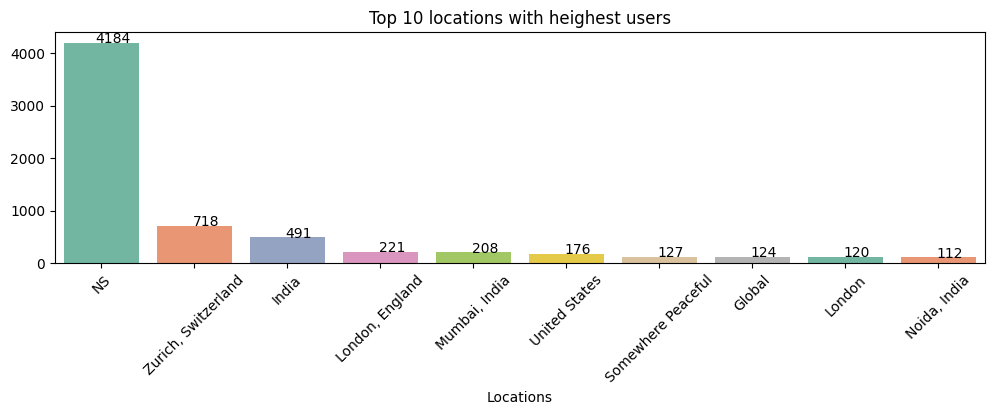

In [27]:
plt.figure(figsize=(12,3))
vc = data.user_location.value_counts()[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=data, palette='Set2')

for i in range(10):
    value = vc[i]
    g.text(y= value -2,x=i +0.125, s=value , color='black',ha='center',fontsize=10)

plt.xticks(rotation=45)
plt.xlabel('Locations')
plt.title('Top 10 locations with heighest users')
plt.show()    

# Observations :- NS stands for Not Specified so Switzerland(718) tops the list followed India(491) & England(221).

In [28]:
data.user_name.value_counts()[:10]

emojized.com                        649
Britany Henry, Master of Science    150
Crypto Avanza                       142
Nivya Krishna                       104
BQ Prime                             86
No DSA NY 🥀 + #FreeAssange ⚖️        49
scalper432                           47
محمد سعيد                            44
Hackpro1                             43
CN Wire                              42
Name: user_name, dtype: int64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129344 (\N{WILTED FLOWER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


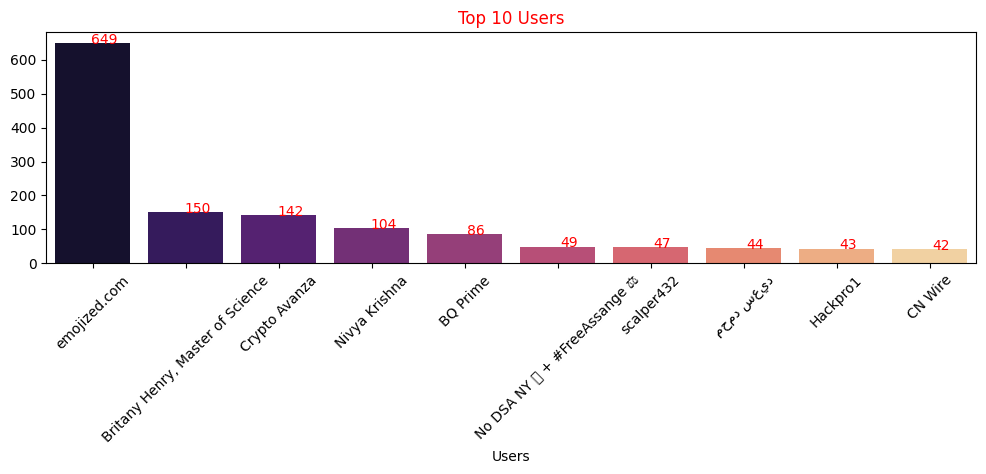

In [29]:
plt.figure(figsize=(12,3))

vc= data.user_name.value_counts()[:10]
g = sns.barplot(x= vc.index , y= vc.values , data= data, palette='magma')

for i in range(10):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Red',ha='center',fontsize=10)

plt.xlabel('Users')
plt.xticks(rotation=45)
plt.title('Top 10 Users', color='Red')
plt.show()    

# Observations :- Emojized.com Twitted the most, followed by Briteny Henry & Crypto Avanza 

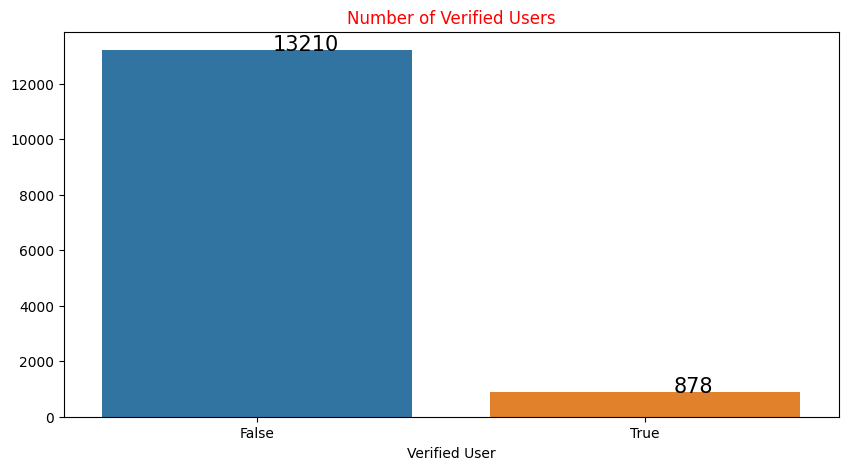

In [30]:
plt.figure(figsize=(10,5))
vc= data.user_verified.value_counts()
g = sns.barplot(x= vc.index , y= vc.values , data= data)

for i in range(2):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Black',ha='center',fontsize=15)

plt.xlabel('Verified User')
plt.title('Number of Verified Users', color='Red')
plt.show()    

# Observations :- Trend is strange as we can see majority of the users twitted are not Verified.

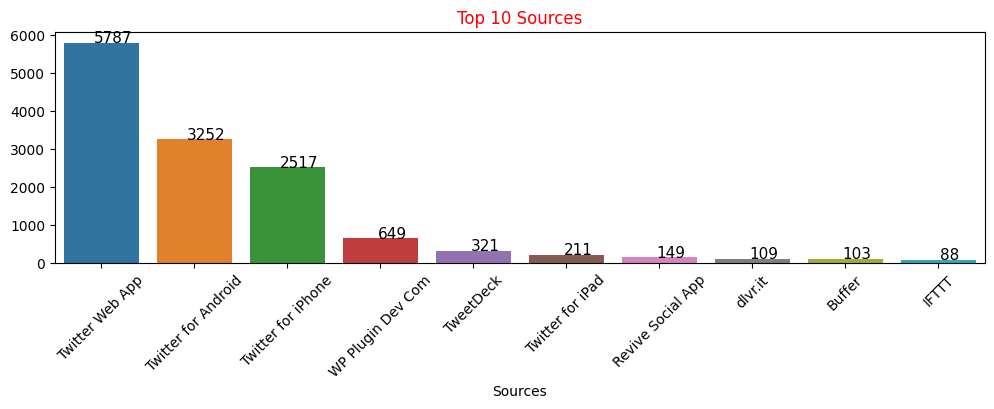

In [31]:
plt.figure(figsize=(12,3))
vc= data.source.value_counts()[:10]
g = sns.barplot(x= vc.index , y= vc.values , data= data)

for i in range(10):
    value=vc[i]
    g.text(y=value -2,x=i+0.125,s=value,color='Black',ha='center',fontsize=11)

plt.xlabel('Sources')
plt.xticks(rotation=45)
plt.title('Top 10 Sources', color='Red')
plt.show()

# Observations :- Most of the users are from Twitter web app(5787) followed by Twitter for android(3252)
#  & Iphone(2517)

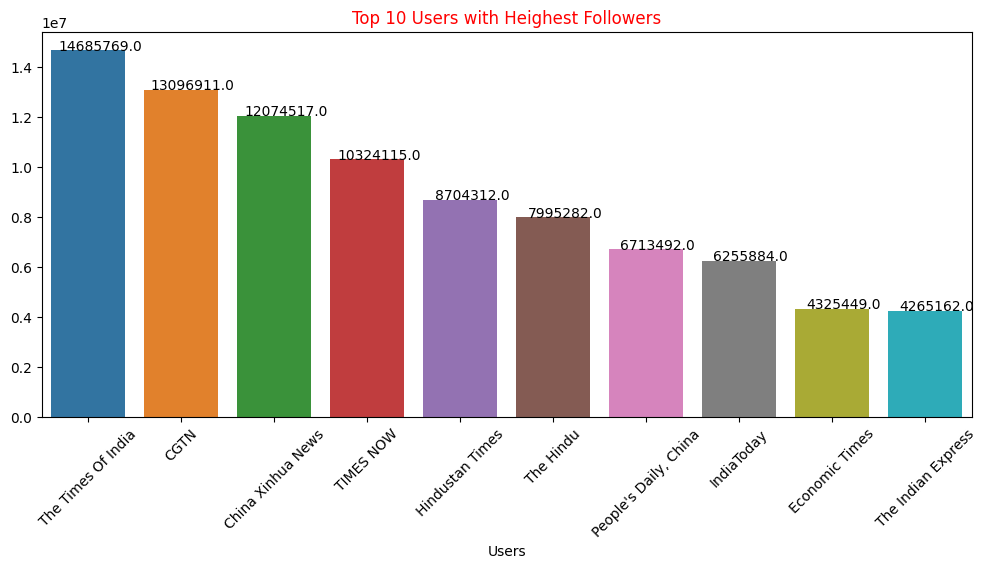

In [32]:
plt.figure(figsize=(12,5))
vc=data.groupby(['user_name'])['user_followers'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=data)
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 10 Users with Heighest Followers',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=45)
plt.show()   

In [33]:
import warnings
warnings.filterwarnings("ignore")

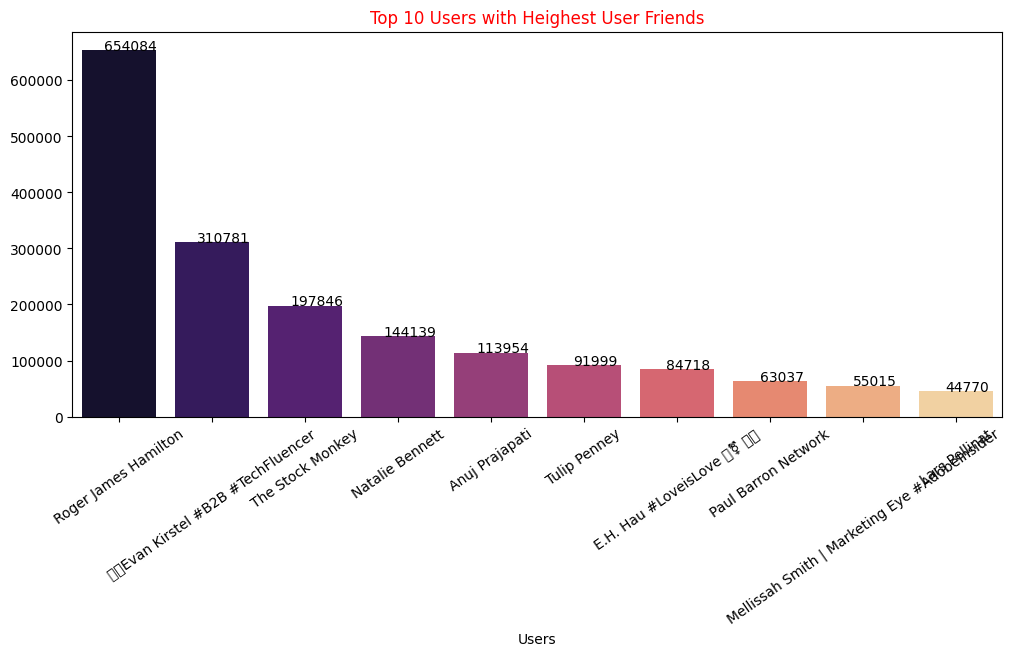

In [34]:
plt.figure(figsize=(12,5))
vc=data.groupby(['user_name'])['user_friends'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=data, palette='magma')
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 10 Users with Heighest User Friends',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=35)
plt.show()   

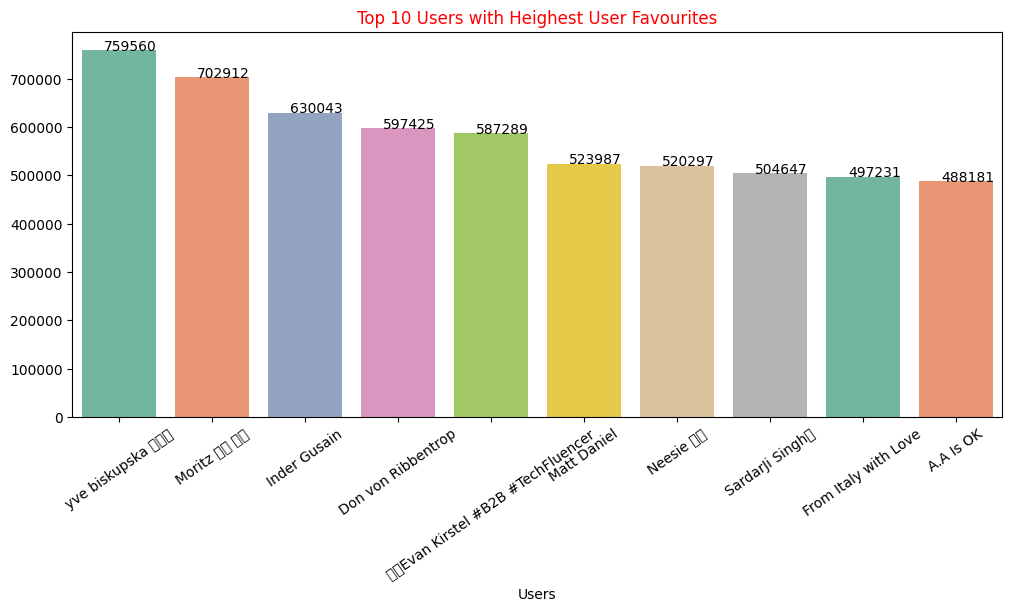

In [35]:
plt.figure(figsize=(12,5))
vc=data.groupby(['user_name'])['user_favourites'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values, data=data, palette='Set2')
for i in range(10):
    value= vc[i]
    g.text(y= value -2,x= i+0.125, s= value, color='black',ha='center', fontsize=10)

plt.title('Top 10 Users with Heighest User Favourites',color='Red')
plt.xlabel('Users')
plt.xticks(rotation=35)
plt.show()